This demonstration shows some common tricks in image comparision -- difference view

People with MATLAB experiences would miss the function
[`imshowpair`](https://www.mathworks.com/help/images/ref/imshowpair.html), but in JuliaImages
it is not that indispensable.

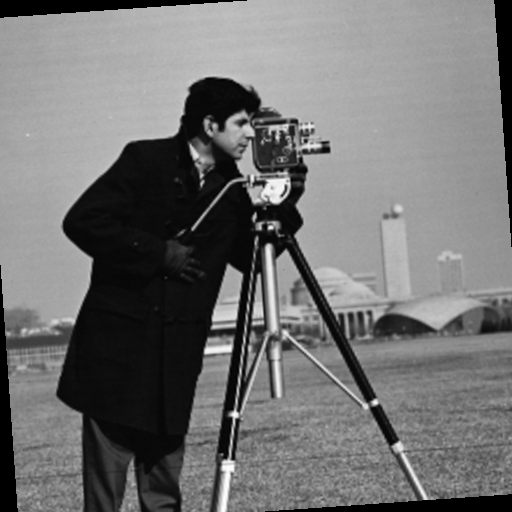

In [1]:
using Images
using TestImages

img = float.(testimage("cameraman"))
# rotate img by 4 degrees and keep axes unchanged
img_r = imrotate(img, -pi/45, axes(img))

`mosaicview` is a convenience tool to show multiple images, especially useful when they have
different sizes and colors.

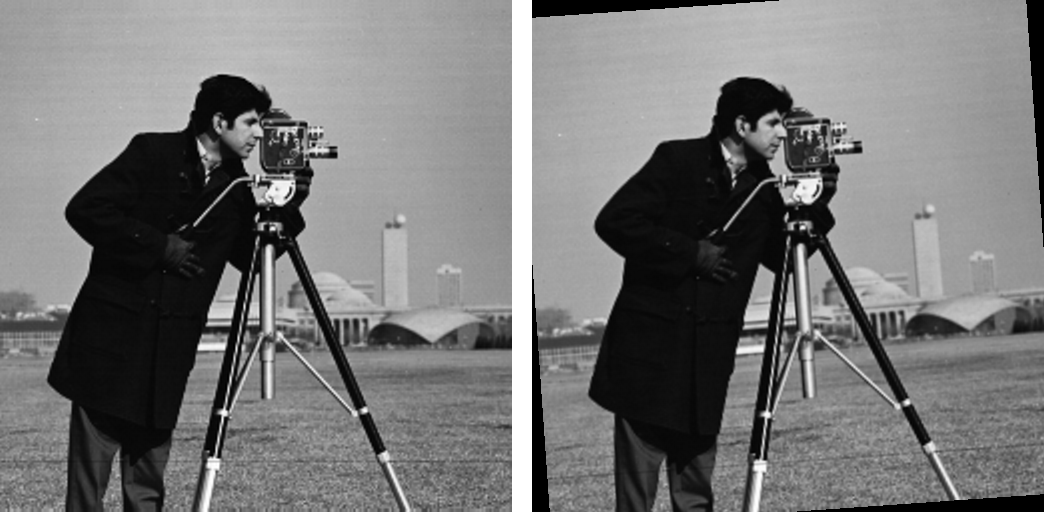

In [2]:
mosaicview(img, img_r; nrow=1, npad=20, fillvalue=colorant"white")

In some cases, when the differences of two images are relative insignificant, a plain
substraction can help amplify the difference.

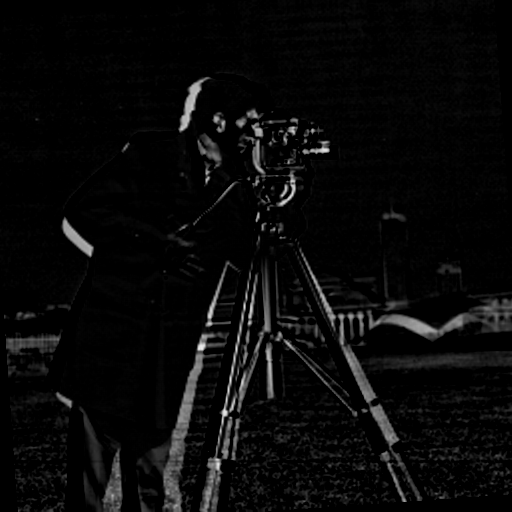

In [3]:
plain_diffview = @. img - img_r

For gray images, a fancy trick is to fill each image into different RGB channels
and make a RGB view. `zeroarray` is a constant which
serves as a placeholder to create a (virtual) all-zeros array of size that matches
the other arguments.

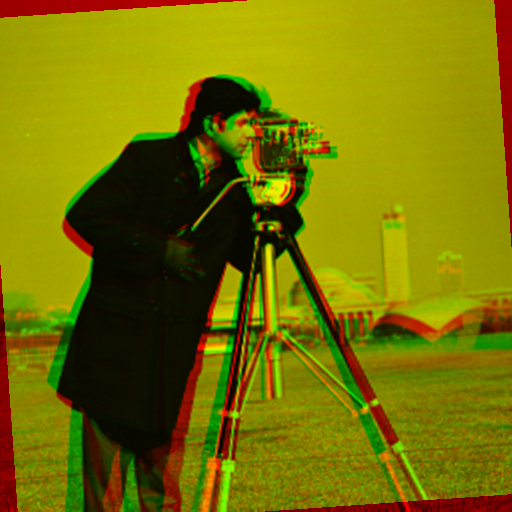

In [4]:
RGB_diffview = colorview(RGB, channelview(img), channelview(img_r), zeroarray)

or convert the RGB view back to Gray image after that

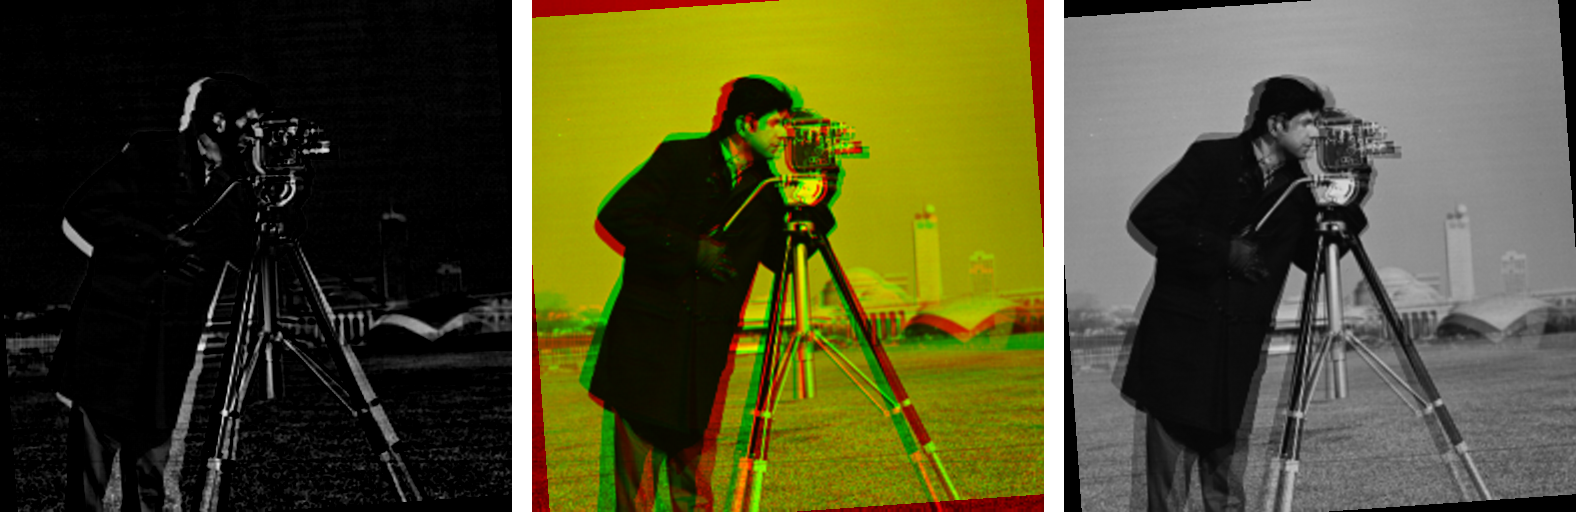

In [5]:
Gray_diffview = Gray.(RGB_diffview)

mosaicview(plain_diffview, RGB_diffview, Gray_diffview;
           nrow=1, npad=20, fillvalue=colorant"white")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*